In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

import kerastuner as kt # for tuning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Flatten

In [37]:
df = pd.read_csv('diabetes.csv')
X = df.drop(columns=['Outcome'])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25, random_state=42)
normalization = Normalizer()
normalization.fit_transform(X_train)
normalization.transform(X_test)

array([[0.02601374, 0.42489113, 0.25146618, ..., 0.14741121, 0.00186432,
        0.18643182],
       [0.01383015, 0.77448841, 0.51863063, ..., 0.24686818, 0.00102343,
        0.14521658],
       [0.01527044, 0.82460373, 0.48865406, ..., 0.23516477, 0.00120636,
        0.16033961],
       ...,
       [0.02154437, 0.44165954, 0.25853242, ..., 0.12064846, 0.002632  ,
        0.12208475],
       [0.0217654 , 0.56590034, 0.36275663, ..., 0.22490911, 0.00179927,
        0.18863345],
       [0.02247101, 0.79397557, 0.53930416, ..., 0.19325066, 0.0015505 ,
        0.20223906]])

---
# Building Model

In [38]:
model = Sequential()

model.add(Dense(
    units = 8,
    activation = 'relu',
    input_dim = 8,
    name = 'input_layer',
    kernel_initializer = 'he_normal'
))
model.add(Dense(
    units = 64,
    activation = 'relu',
    name ='hidden_layer1',
    kernel_initializer = 'he_normal'
))
model.add(Dense(
    units = 128,
    activation = 'relu',
    name = 'hiddel_layer2',
    kernel_initializer = 'he_normal'
))
model.add(Dense(
    units = 1,
    activation = 'sigmoid',
    name = 'OutPut_layer'
))

model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [39]:
X_train.shape[0]

576

In [40]:
history = model.fit(X_train,y_train,validation_batch_size=X_train.shape[0], 
                    epochs=100,validation_split=0.2)

Epoch 1/100
15/15 [==============================] - 1s 15ms/step - loss: 7.1318 - accuracy: 0.5283 - val_loss: 4.6476 - val_accuracy: 0.6121
Epoch 2/100
15/15 [==============================] - 0s 9ms/step - loss: 2.8525 - accuracy: 0.5957 - val_loss: 1.8102 - val_accuracy: 0.4397
Epoch 3/100
15/15 [==============================] - 0s 9ms/step - loss: 1.3537 - accuracy: 0.5957 - val_loss: 1.3059 - val_accuracy: 0.5862
Epoch 4/100
15/15 [==============================] - 0s 7ms/step - loss: 1.0355 - accuracy: 0.6217 - val_loss: 1.0259 - val_accuracy: 0.5690
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 1.1137 - accuracy: 0.6239 - val_loss: 0.8671 - val_accuracy: 0.6293
Epoch 6/100
15/15 [==============================] - 0s 7ms/step - loss: 1.2561 - accuracy: 0.6196 - val_loss: 1.1697 - val_accuracy: 0.6466
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.9441 - accuracy: 0.6304 - val_loss: 1.2878 - val_accuracy: 0.6293
Epoch 8/100


Text(0.5, 1.0, 'val_loss- 0.985 and loss- 0.854')

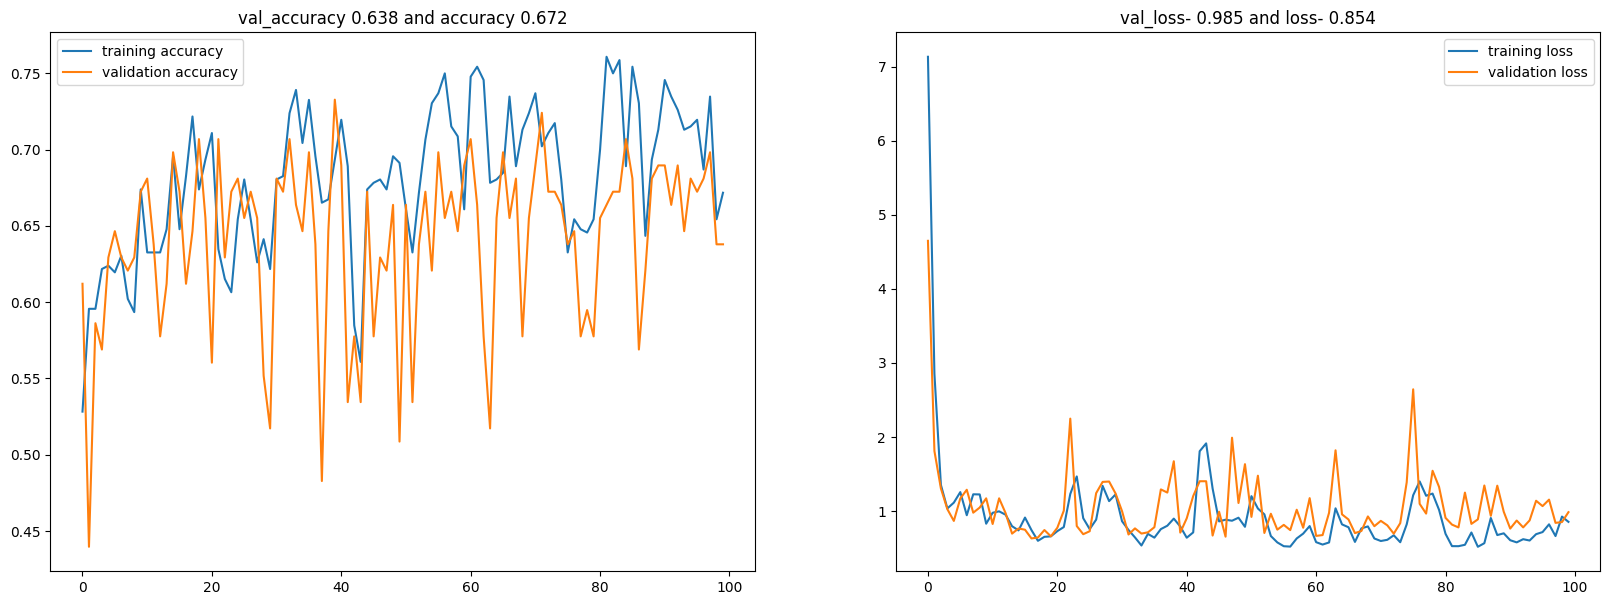

In [41]:
plt.subplots(nrows=1,ncols=2,figsize = (20,7))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training accuracy','validation accuracy'])
plt.title(f'val_accuracy {round(history.history["val_accuracy"][99],ndigits=3)} and accuracy {round(history.history["accuracy"][99],ndigits=3)}')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss','validation loss'])
plt.title(f'val_loss- {round(history.history["val_loss"][99],ndigits=3)} and loss- {round(history.history["loss"][99],ndigits=3)}')
